In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
agonist_data = pd.read_csv('../data/agonist_MolecularProperties.csv')
non_agonist_data = pd.read_csv('../data/non_agonist_MolecularProperties.csv')

In [8]:
agonist_data

,Unnamed: 0,smiles,weight,logp,rotatable_bonds,tpsa,rings,AroRings,h_donors,h_acceptors
0,0,Cc1ccc(-c2nc(C#N)c(S(=O)(=O)N(C)CCO)o2)cc1,321.358,1.13450,5,107.43,2,2,1,6
1,1,CCOC(=O)c1cn2c(n1)CCC2,180.207,1.00600,2,44.12,2,1,0,4
2,2,N#Cc1ccc(CSc2nc(=O)cc(O)[nH]2)cc1,259.290,1.63948,3,89.77,2,2,2,5
3,3,Fc1ccc(-c2nnnn2-c2ccc(Br)cn2)cc1,320.125,2.62590,2,56.49,3,3,0,5
4,4,CCc1ccc(NC(=O)c2c(C(=O)Nc3ccc(C(=O)OC)cc3)sc3n...,490.541,3.91802,6,118.87,4,4,2,8
...,...,...,...,...,...,...,...,...,...,...
822,822,Cc1cc(-c2nnc3c4ccccc4c(OCc4cn(C)nn4)nn23)no1,362.353,1.94842,4,109.05,5,5,0,10
823,823,O=C(Nc1c(-c2cccs2)nc2cc(Br)ccn12)c1ccc(Cl)cc1,432.730,5.73100,3,46.40,4,4,1,4
824,824,O=C(Nc1c(C2CCCC2)nc2ccc(Br)cn12)c1ccccc1,384.277,5.00670,3,46.40,4,3,1,3
825,825,COc1ccc(Nc2cc3c(cn2)ncn3CC2CC2)c(OC)c1,324.384,3.60210,6,61.20,4,3,1,6


In [9]:
non_agonist_data

,Unnamed: 0,smiles,weight,logp,rotatable_bonds,tpsa,rings,AroRings,h_donors,h_acceptors
0,0,CSc1nn(-c2c(Cl)cc(C(F)(F)F)cc2Cl)c(N)c1-c1ccccc1C,432.298,6.47742,3,43.84,3,3,1,4
1,1,[O-][n+]1nc2c(-c3nc[nH]n3)cnn2c2cc(Cl)ccc21,287.670,0.95440,1,98.70,4,4,1,6
2,2,CC(=O)C1CCC2C3CCC4CC(O)CCC4(C)C3CCC12C,318.501,4.59520,1,37.30,4,0,1,2
3,3,O=C(NC1CCCCC1)C1Cc2c(sc3ccccc23)CN1,314.454,3.36450,2,41.13,4,2,2,3
4,4,CCCCNc1c(C(=O)OCC)c(C)nc2c1cnn2CC,304.394,3.14832,7,69.04,2,2,1,6
...,...,...,...,...,...,...,...,...,...,...
1077,1077,On1ncc(C2CCNCC2)c1-c1cccc(-c2ccccc2)c1,319.408,3.92140,3,50.08,4,3,2,4
1078,1078,CC1SC(=N)NC1CC(=O)O,174.225,0.48937,2,73.18,1,0,3,3
1079,1079,COc1ccc2cnc3c(C(=O)NC(C)C)cnn3c2c1,284.319,2.02930,3,68.52,3,3,1,5
1080,1080,COc1ccc2cnc3c(C(N)=O)cnn3c2c1,242.238,0.99000,2,82.51,3,3,1,5


In [10]:
# Define data for two samples
agonist_wt = agonist_data['weight'].tolist()
non_agonist_wt = non_agonist_data['weight'].tolist()
agonist_lp = agonist_data['logp'].tolist()
non_agonist_lp = non_agonist_data['logp'].tolist()
agonist_rb = agonist_data['rotatable_bonds'].tolist()
non_agonist_rb = non_agonist_data['rotatable_bonds'].tolist()
agonist_tpsa = agonist_data['tpsa'].tolist()
non_agonist_tpsa = non_agonist_data['tpsa'].tolist()
agonist_r = agonist_data['rings'].tolist()
non_agonist_r = non_agonist_data['rings'].tolist()
agonist_ar = agonist_data['AroRings'].tolist()
non_agonist_ar = non_agonist_data['AroRings'].tolist()
agonist_hd = agonist_data['h_donors'].tolist()
non_agonist_hd = non_agonist_data['h_donors'].tolist()
agonist_ha = agonist_data['h_acceptors'].tolist()
non_agonist_ha = non_agonist_data['h_acceptors'].tolist()

In [11]:
# Organize the data into DataFrame format
data1 = {'Weight': ['Agonist'] * len(agonist_wt) + ['Non_agonist'] * len(non_agonist_wt),
        'Value': agonist_wt + non_agonist_wt}
data2 = {'LogP': ['Agonist'] * len(agonist_lp) + ['Non_agonist'] * len(non_agonist_lp),
        'Value': agonist_lp + non_agonist_lp}
data3 = {'Rotatable_bonds': ['Agonist'] * len(agonist_rb) + ['Non_agonist'] * len(non_agonist_rb),
        'Value': agonist_rb + non_agonist_rb}
data4 = {'TPSA': ['Agonist'] * len(agonist_tpsa) + ['Non_agonist'] * len(non_agonist_tpsa),
        'Value': agonist_tpsa + non_agonist_tpsa}
data5 = {'Rings': ['Agonist'] * len(agonist_r) + ['Non_agonist'] * len(non_agonist_r),
        'Value': agonist_r + non_agonist_r}
data6 = {'AroRings': ['Agonist'] * len(agonist_ar) + ['Non_agonist'] * len(non_agonist_ar),
        'Value': agonist_ar + non_agonist_ar}
data7 = {'H_donors': ['Agonist'] * len(agonist_hd) + ['Non_agonist'] * len(non_agonist_hd),
         'Value': agonist_hd + non_agonist_hd}
data8 = {'H_acceptors': ['Agonist'] * len(agonist_ha) + ['Non_agonist'] * len(non_agonist_ha),
        'Value': agonist_ha + non_agonist_ha}


df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)
df5 = pd.DataFrame(data5)
df6 = pd.DataFrame(data6)
df7 = pd.DataFrame(data7)
df8 = pd.DataFrame(data8)

# box plots

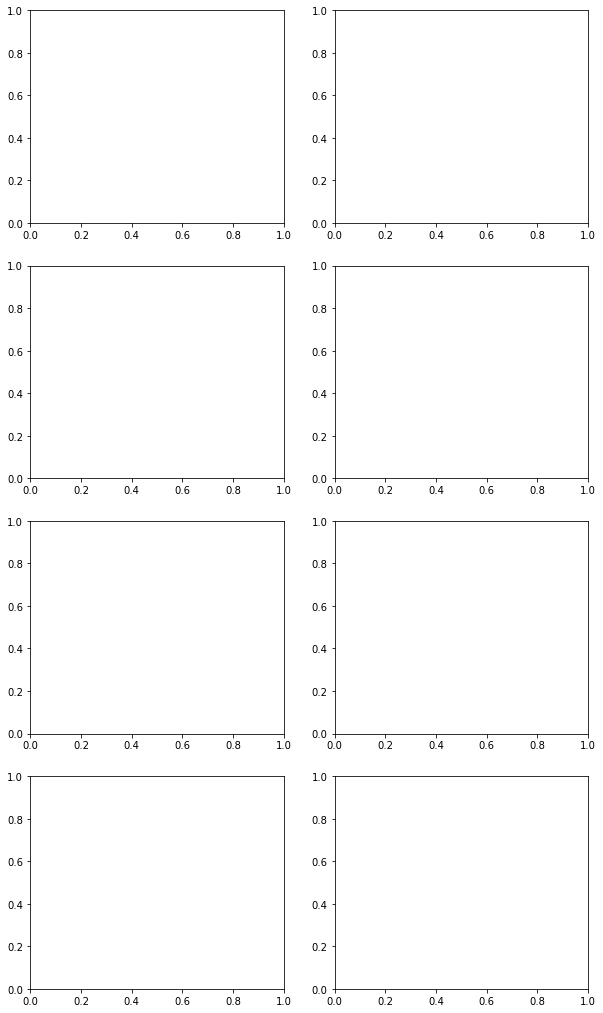

In [12]:
fig_box, axes_box = plt.subplots(4, 2, figsize=(10, 18))

In [13]:
sns.boxplot(x='Weight', y='Value', data=df1, ax=axes_box[0][0],showfliers=False)
sns.boxplot(x='LogP', y='Value', data=df2, ax=axes_box[0][1],showfliers=False)
sns.boxplot(x='Rotatable_bonds', y='Value', data=df3, ax=axes_box[1][0],showfliers=False)
sns.boxplot(x='TPSA', y='Value', data=df4, ax=axes_box[1][1],showfliers=False)
sns.boxplot(x='Rings', y='Value', data=df5, ax=axes_box[2][0],showfliers=False)
sns.boxplot(x='AroRings', y='Value', data=df6, ax=axes_box[2][1],showfliers=False)
sns.boxplot(x='H_donors', y='Value', data=df7, ax=axes_box[3][0],showfliers=False)
sns.boxplot(x='H_acceptors', y='Value', data=df8, ax=axes_box[3][1],showfliers=False)

<AxesSubplot:xlabel='H_acceptors', ylabel='Value'>

In [14]:
for i in range(4):
    for j in range(2):
        axes_box[i][j].set_ylabel('')

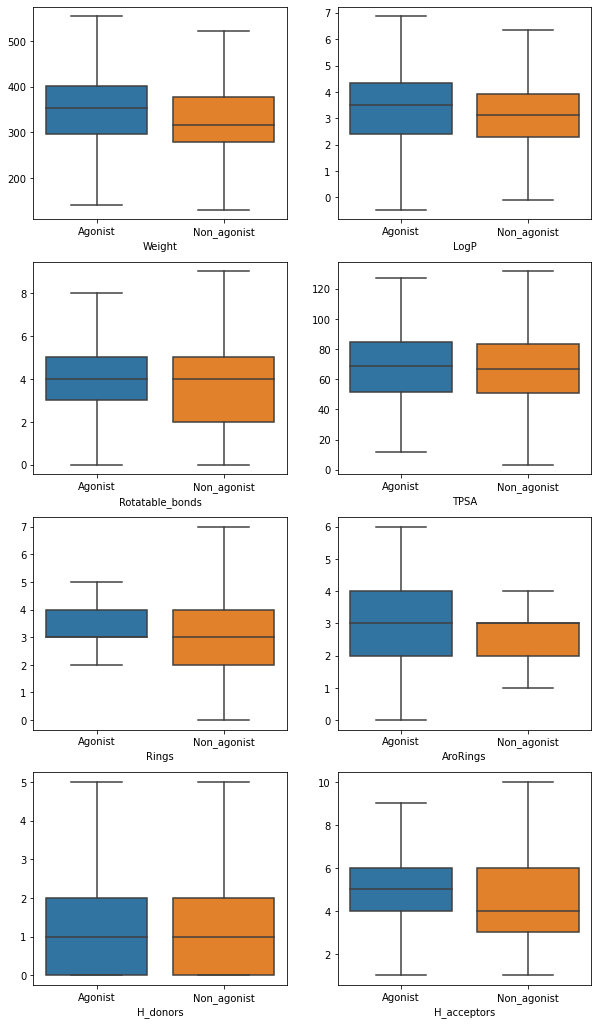

In [15]:
fig_box

# Violin diagram

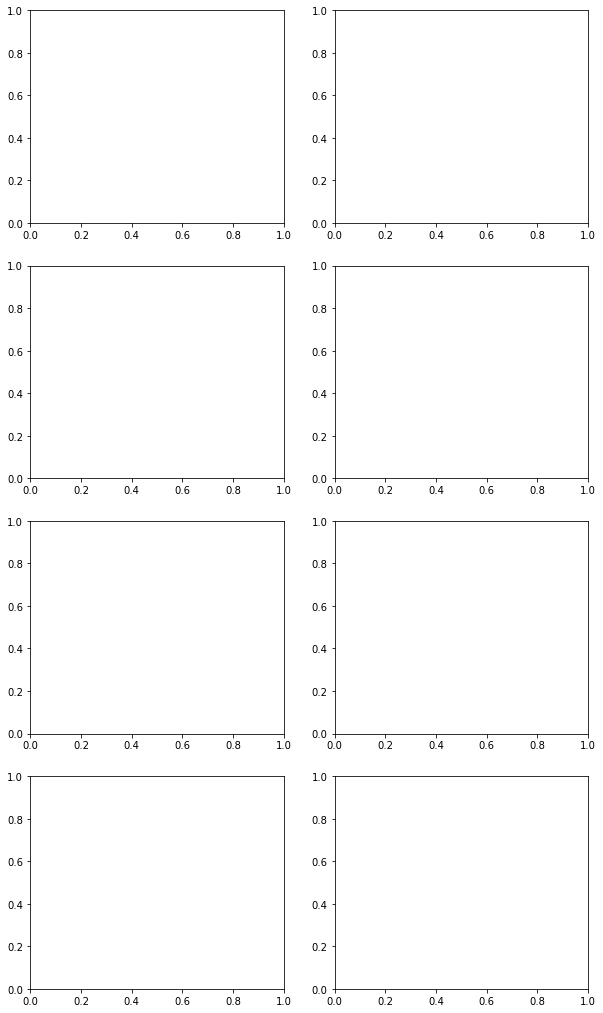

In [16]:
fig_violin, axes_violin = plt.subplots(4, 2, figsize=(10, 18))

In [17]:
sns.violinplot(x='Weight', y='Value', data=df1, ax=axes_violin[0][0],showfliers=False)
sns.violinplot(x='LogP', y='Value', data=df2, ax=axes_violin[0][1],showfliers=False)
sns.violinplot(x='Rotatable_bonds', y='Value', data=df3, ax=axes_violin[1][0],showfliers=False)
sns.violinplot(x='TPSA', y='Value', data=df4, ax=axes_violin[1][1],showfliers=False)
sns.violinplot(x='Rings', y='Value', data=df5, ax=axes_violin[2][0],showfliers=False)
sns.violinplot(x='AroRings', y='Value', data=df6, ax=axes_violin[2][1],showfliers=False)
sns.violinplot(x='H_donors', y='Value', data=df7, ax=axes_violin[3][0],showfliers=False)
sns.violinplot(x='H_acceptors', y='Value', data=df8, ax=axes_violin[3][1],showfliers=False)

<AxesSubplot:xlabel='H_acceptors', ylabel='Value'>

In [18]:
for i in range(4):
    for j in range(2):
        axes_violin[i][j].set_ylabel('')

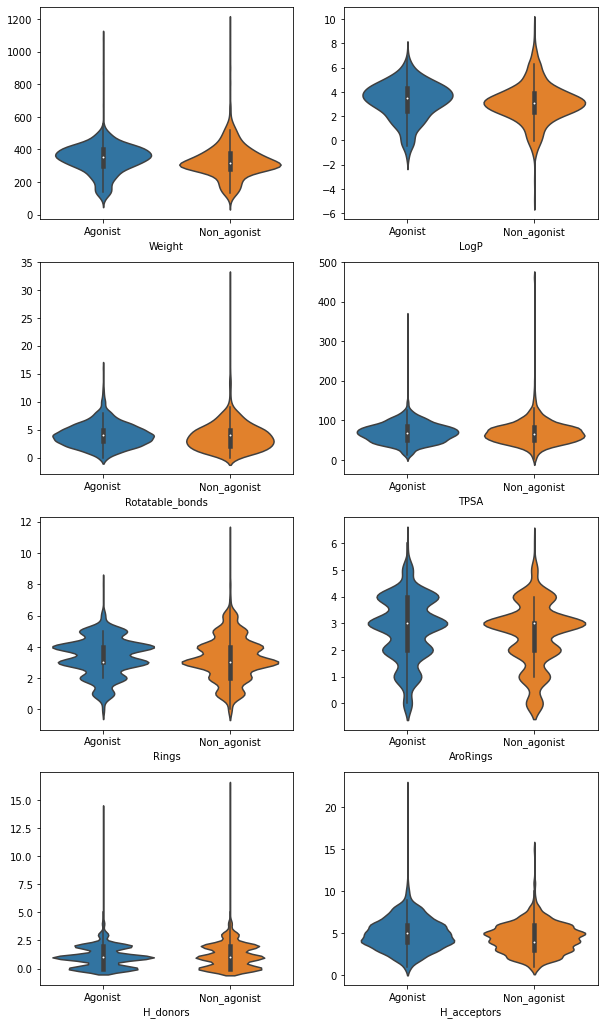

In [19]:
fig_violin

In [80]:
# fig.savefig('MolecularProperties', dpi=300)